In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [15]:
crashes = pd.read_csv('../data/crashes_crashes.csv')

In [17]:
sorted([col for col in crashes.columns])

['ALIGNMENT',
 'BEAT_OF_OCCURRENCE',
 'CRASH_DATE',
 'CRASH_DATE_EST_I',
 'CRASH_DAY_OF_WEEK',
 'CRASH_HOUR',
 'CRASH_MONTH',
 'CRASH_RECORD_ID',
 'CRASH_TYPE',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'DEVICE_CONDITION',
 'DOORING_I',
 'FIRST_CRASH_TYPE',
 'HIT_AND_RUN_I',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_NO_INDICATION',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_TOTAL',
 'INJURIES_UNKNOWN',
 'INTERSECTION_RELATED_I',
 'LANE_CNT',
 'LATITUDE',
 'LIGHTING_CONDITION',
 'LOCATION',
 'LONGITUDE',
 'MOST_SEVERE_INJURY',
 'NOT_RIGHT_OF_WAY_I',
 'NUM_UNITS',
 'PHOTOS_TAKEN_I',
 'POSTED_SPEED_LIMIT',
 'PRIM_CONTRIBUTORY_CAUSE',
 'REPORT_TYPE',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'SEC_CONTRIBUTORY_CAUSE',
 'STATEMENTS_TAKEN_I',
 'STREET_DIRECTION',
 'STREET_NAME',
 'STREET_NO',
 'TRAFFICWAY_TYPE',
 'TRAFFIC_CONTROL_DEVICE',
 'WEATHER_CONDITION',
 'WORKERS_PRESENT_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE']

## Weather as a factor in severity of injuries

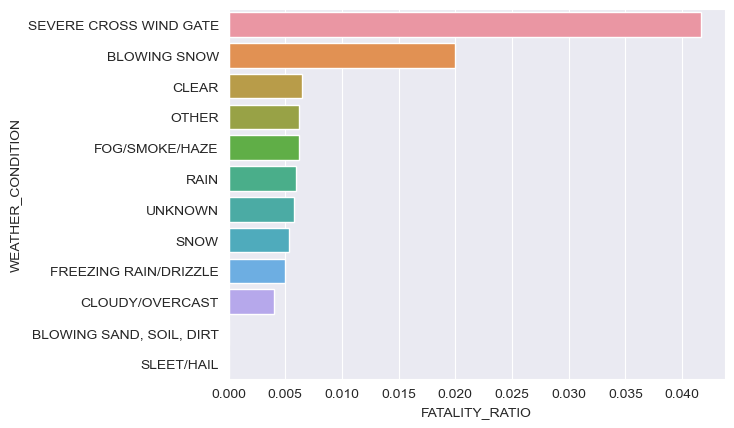

In [18]:
injuries_weather = crashes[['WEATHER_CONDITION', 'INJURIES_FATAL', 'INJURIES_TOTAL']].\
                    groupby('WEATHER_CONDITION').sum().reset_index()
injuries_weather['FATALITY_RATIO'] = injuries_weather['INJURIES_FATAL'] / injuries_weather['INJURIES_TOTAL']
injuries_weather = injuries_weather.sort_values(by = 'FATALITY_RATIO', ascending = False)

sns.barplot(injuries_weather, y = 'WEATHER_CONDITION', x = 'FATALITY_RATIO');

## Top 10 accident causes before binning

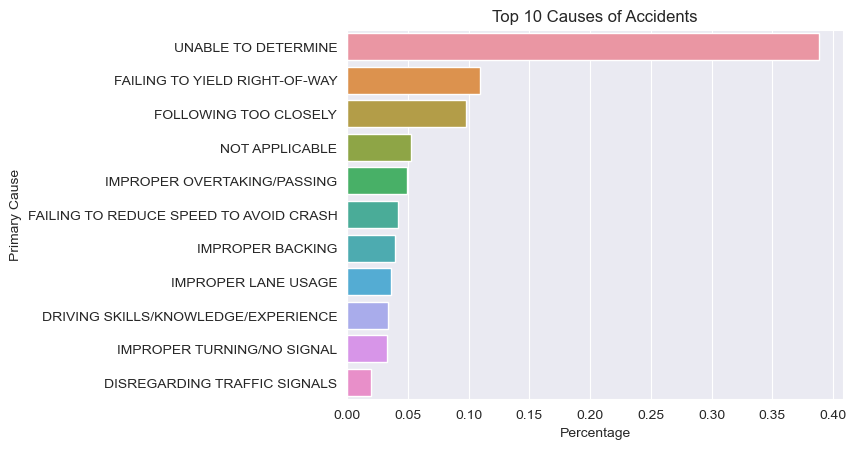

In [62]:
target = 'PRIM_CONTRIBUTORY_CAUSE'
causes_df = crashes[[target, 'CRASH_RECORD_ID']].groupby(target).count().\
            sort_values(by = 'CRASH_RECORD_ID', ascending = False).reset_index()
causes_df['CAUSE_PERC'] = causes_df['CRASH_RECORD_ID'] / causes_df['CRASH_RECORD_ID'].sum()
causes_df
causes_plot = sns.barplot(causes_df.loc[:10], x = 'CAUSE_PERC', y = target)
causes_plot.set(xlabel = 'Percentage',
                ylabel = 'Primary Cause',
               title = 'Top 10 Causes of Accidents')
causes_plot;

## Analysis of injury severity by hour of the day

In [20]:
injuries_hour = crashes[['CRASH_HOUR', 'INJURIES_FATAL', 'INJURIES_TOTAL']].groupby('CRASH_HOUR').\
            sum().reset_index()
injuries_hour['FATALITY_RATIO'] = injuries_hour['INJURIES_FATAL'] / injuries_hour['INJURIES_TOTAL']
injuries_hour = injuries_hour.sort_values(by ='FATALITY_RATIO', ascending = False)
injuries_hour

,CRASH_HOUR,INJURIES_FATAL,INJURIES_TOTAL,FATALITY_RATIO
3,3,53.0,2539.0,0.020874
1,1,63.0,3592.0,0.017539
4,4,37.0,2154.0,0.017177
2,2,57.0,3381.0,0.016859
5,5,33.0,2311.0,0.014280
23,23,68.0,5046.0,0.013476
22,22,57.0,5673.0,0.010048
0,0,43.0,4294.0,0.010014
21,21,58.0,6156.0,0.009422
20,20,57.0,6532.0,0.008726


### Total injuries by hour

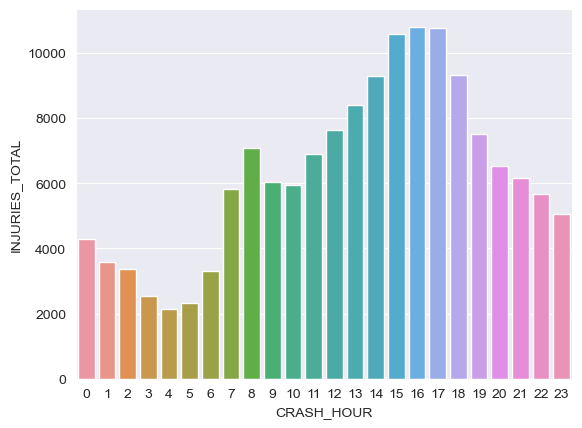

In [21]:
sns.barplot(injuries_hour, y = 'INJURIES_TOTAL', x = 'CRASH_HOUR');

### Fatal injuries ratio by hour

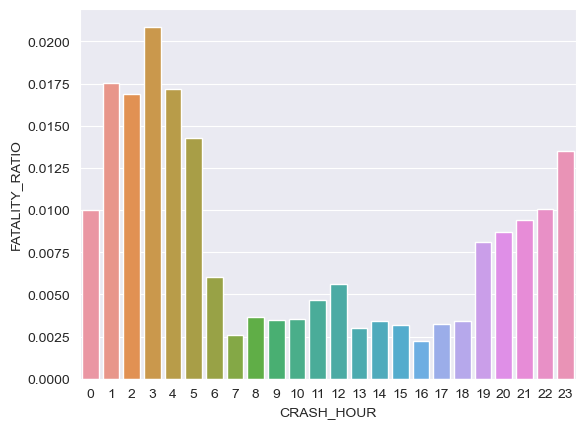

In [22]:
sns.barplot(injuries_hour, y = 'FATALITY_RATIO', x = 'CRASH_HOUR');

## Analysis of injury severity by month  

In [23]:
injuries_month = crashes[['CRASH_MONTH', 'INJURIES_FATAL', 'INJURIES_TOTAL']].groupby('CRASH_MONTH').\
            sum().reset_index()
injuries_month['FATALITY_RATIO'] = injuries_month['INJURIES_FATAL'] / injuries_month['INJURIES_TOTAL']
injuries_month = injuries_month.sort_values(by ='FATALITY_RATIO', ascending = False)

injuries_month

,CRASH_MONTH,INJURIES_FATAL,INJURIES_TOTAL,FATALITY_RATIO
6,7,102.0,14479.0,0.007045
11,12,86.0,12663.0,0.006791
8,9,97.0,14578.0,0.006654
7,8,94.0,14301.0,0.006573
0,1,70.0,10657.0,0.006568
1,2,57.0,8851.0,0.006440
2,3,65.0,10220.0,0.006360
5,6,82.0,13663.0,0.006002
10,11,77.0,12957.0,0.005943
4,5,75.0,12895.0,0.005816


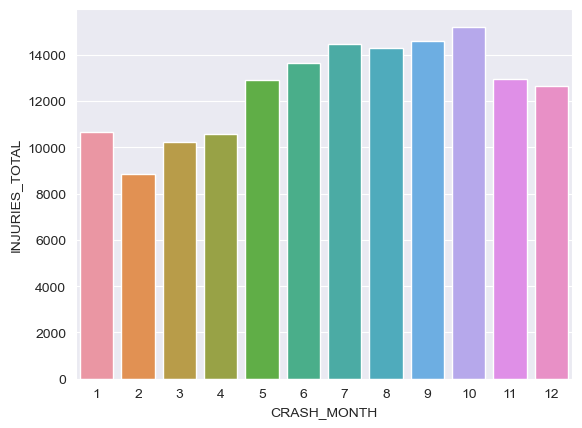

In [24]:
sns.barplot(injuries_month, x = 'CRASH_MONTH', y = 'INJURIES_TOTAL');

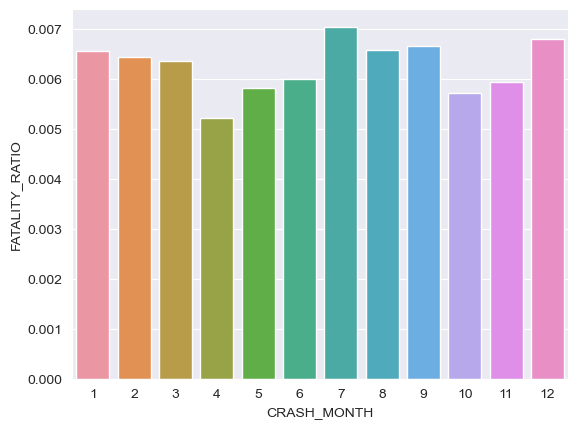

In [25]:
sns.barplot(injuries_month, x = 'CRASH_MONTH', y = 'FATALITY_RATIO');

## Injury level by roadway surface condition

- 0: No indication of injury
- 1: Reported, not evident
- 2: Nonincapacitating injury
- 3: Incapacitating injury
- 4: Fatal injury 

0 is excluded from graphs since it's the largest percentage with a significant difference in every case

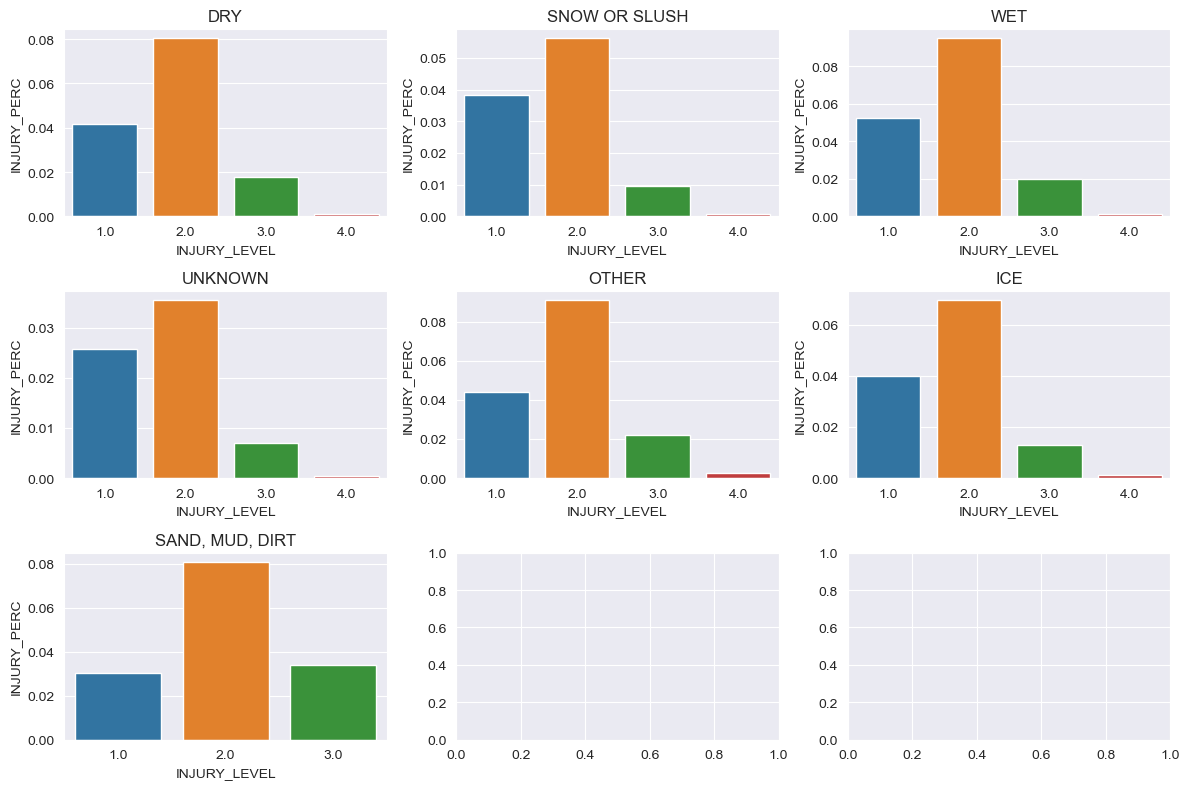

In [55]:


injury_level = ['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',  'NONINCAPACITATING INJURY',
                 'INCAPACITATING INJURY', 'FATAL']

crashes['INJURY_LEVEL'] = crashes['MOST_SEVERE_INJURY'].\
                        replace(to_replace = injury_level, value = [0, 1, 2, 3, 4])

roadway_conditions = crashes['ROADWAY_SURFACE_COND'].unique()

surf_cond_injury = crashes[['ROADWAY_SURFACE_COND', 'INJURY_LEVEL', 'MOST_SEVERE_INJURY']].\
        groupby(['ROADWAY_SURFACE_COND', 'INJURY_LEVEL']).count().reset_index()

tot_injuries = surf_cond_injury.groupby('ROADWAY_SURFACE_COND').sum()['MOST_SEVERE_INJURY'] 
                
surf_cond_injury = surf_cond_injury.merge(tot_injuries, how = 'left', on = 'ROADWAY_SURFACE_COND').\
                    rename(columns = {'MOST_SEVERE_INJURY_y': 'TOTAL_INJURIES',
                                      'MOST_SEVERE_INJURY_x': 'MOST_SEVERE_INJURY'})

surf_cond_injury['INJURY_PERC'] = surf_cond_injury['MOST_SEVERE_INJURY'] / surf_cond_injury['TOTAL_INJURIES']

fig, ax = plt.subplots(3, 3, figsize = (12, 8))

for i, cond in enumerate(roadway_conditions):
    plot_df = surf_cond_injury[(surf_cond_injury['ROADWAY_SURFACE_COND'] == cond) &\
                               (surf_cond_injury['INJURY_LEVEL'] != 0)]
    rows = i // 3
    cols = i % 3
    sns.barplot(plot_df, x = 'INJURY_LEVEL', y = 'INJURY_PERC',\
                ax = ax[rows,cols]).set(title = cond)
plt.tight_layout()
# surf_cond_injury